Do wykonania zadań niezbędne będzie pobranie bazy filmów oraz bazy gatunków: Baza filmów, Baza gatunków

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

df_genres = pd.read_csv('tmdb_genres.csv')
df_movies = pd.read_csv('tmdb_movies.csv')

df_movies.describe()


,Unnamed: 0,budget,id,popularity,revenue,runtime,vote_average,vote_count,genre_id
count,4803.000000,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000,4775.000000
mean,2401.000000,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989,634.411309
std,1386.651002,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891,2415.010323
min,0.000000,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,12.000000
25%,1200.500000,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000,18.000000
50%,2401.000000,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,28.000000
75%,3601.500000,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000,35.000000
max,4802.000000,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,10770.000000


1. Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [6]:
best_movies = (
    df_movies
    [df_movies['vote_count'] > 737] 
    .sort_values('vote_average', ascending=False)
    ['original_title'].tolist()[:10]
)


print(best_movies)

['The Shawshank Redemption', 'The Godfather', 'The Godfather: Part II', 'Pulp Fiction', 'Whiplash', "Schindler's List", 'Fight Club', '千と千尋の神隠し', 'Psycho', "One Flew Over the Cuckoo's Nest"]


2. Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). 

In [158]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])
df_movies = df_movies.dropna(subset=['release_date']) # Usuwam puste jeżeli są w ogóle (choć sprawdzałem ręcznie i 1 był)

year_range = ((df_movies['release_date'] >= '2010-01-01') & (df_movies['release_date'] <= '2016-12-31')) # Wybieram zakres

year_table = df_movies.loc[year_range].groupby(pd.Grouper(key='release_date',freq='YS')).agg({'revenue':'mean','budget':'mean'})
# Biorę wszystkie rekordy z year_range i grupuje je po dacie. Wykonuje agregacje revenue : średnia, budget : średnia


year_table

,revenue,budget
release_date,,
2010-01-01,9.043811e+07,3.449541e+07
2011-01-01,9.200413e+07,3.477232e+07
2012-01-01,1.160659e+08,3.492203e+07
2013-01-01,1.013485e+08,3.552329e+07
2014-01-01,1.013466e+08,3.095989e+07
2015-01-01,1.054399e+08,3.113216e+07
2016-01-01,1.390496e+08,4.570327e+07


2. Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi. Przykład wykresu widoczny poniżej:

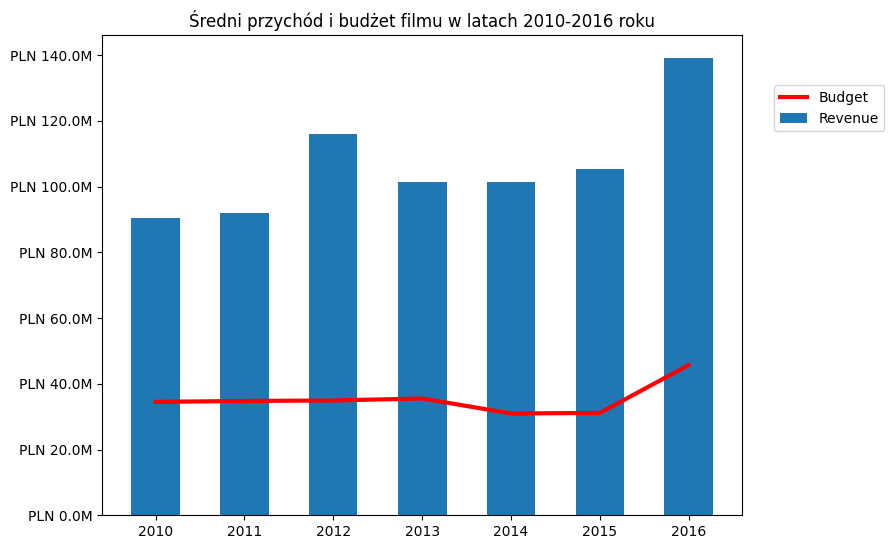

In [159]:
fig = plt.figure()
axis = fig.add_axes([0,0,1,1])

def million(x, pos):
        return 'PLN {:2.1f}M'.format(x*1e-6)

axis.plot(year_table.index, year_table['budget'], label='Budget' , color='red', linewidth=3)
axis.set_title('Średni przychód i budżet filmu w latach 2010-2016 roku')

formatter = plt.FuncFormatter(million)

axis.yaxis.set_major_formatter(formatter)
axis.bar(year_table.index, year_table['revenue'], label='Revenue', width=200)

axis.legend(loc=(1.05,0.8))
plt.show()

3. Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [118]:
df_genres.rename(columns={
    'Unnamed: 0': 'genre_id'}, inplace=True)

df_movies = df_movies.merge(df_genres, on='genre_id', how='left')

In [160]:
df_movies

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id,genres
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0,Action
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0,Adventure
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0,Action
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0,Action
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,4798,220000,NaN,9367,es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,1992-09-04,2040920,81.0,Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,28.0,Action
4799,4799,9000,NaN,72766,en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,2011-12-26,0,85.0,Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,35.0,Comedy
4800,4800,0,http://www.hallmarkchannel.com/signedsealeddel...,231617,en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,2013-10-13,0,120.0,Released,NaN,"Signed, Sealed, Delivered",7.0,6,35.0,Comedy
4801,4801,0,http://shanghaicalling.com/,126186,en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,2012-05-03,0,98.0,Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN,NaN


4. Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [99]:
s = df_movies['genres'].value_counts()

print(f"Najczęściej pojawia się gatunek : {s.idxmax()} i występuje {s.max()} razy")


Najczęściej pojawia się gatunek : Drama i występuje 1207 razy


5. Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [162]:

runt = (
    df_movies
    .groupby('genres')['runtime']
    .mean()
    .sort_values(ascending=False)
)

print(f"Średnio najdłuższy czas trwania mają filmy z gatunku : {runt.idxmax()}")

Średnio najdłuższy czas trwania mają filmy z gatunku : History


6. Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

<Axes: >

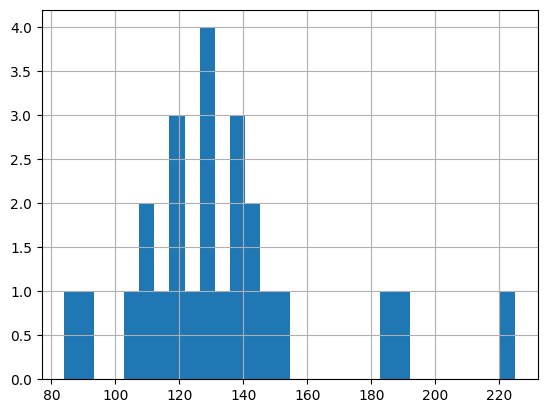

In [161]:
df_movies.loc[df_movies['genres'] == runt.idxmax(), 'runtime'].hist(bins=30)